In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.figure_factory as fig_fact
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


In [7]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 3628-1990

 Directory of C:\Users\Praffulla\Desktop\Data Science\Survey new

06/20/2019  06:38 PM    <DIR>          .
06/20/2019  06:38 PM    <DIR>          ..
06/20/2019  06:38 PM    <DIR>          .ipynb_checkpoints
11/03/2018  10:35 PM         1,360,985 freeFormResponses.csv
11/03/2018  10:35 PM        41,189,695 multipleChoiceResponses.csv
06/03/2019  03:34 PM             1,274 myplot.png
06/20/2019  06:38 PM            81,159 Survery_experience_analysis.ipynb
11/03/2018  10:35 PM             8,449 SurveySchema.csv
06/20/2019  06:32 PM           656,166 Survey_Data_analytics.ipynb
06/20/2019  06:35 PM               555 Survey_data_analytics_part2.ipynb
06/17/2019  06:11 PM           166,930 temp.csv
               8 File(s)     43,465,213 bytes
               3 Dir(s)  141,978,955,776 bytes free


In [8]:
df=pd.read_csv(r"/Users/vishwaprabhakarsingh/Desktop/DataScience_may_2019_noon/survey_data_analytics-2018/multipleChoiceResponses.csv")

FileNotFoundError: [Errno 2] File b'/Users/vishwaprabhakarsingh/Desktop/DataScience_may_2019_noon/survey_data_analytics-2018/multipleChoiceResponses.csv' does not exist: b'/Users/vishwaprabhakarsingh/Desktop/DataScience_may_2019_noon/survey_data_analytics-2018/multipleChoiceResponses.csv'

In [9]:
temdf=df.head(50)
temdf.to_csv('temp.csv')

NameError: name 'df' is not defined

In [ ]:
df.head()

In [ ]:
sns.countplot(y="Q1",data=df)

In [ ]:
df['Q9'].unique()

In [ ]:
salarydf=df['Q9'].value_counts().reindex(['10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'])
salarydf

In [ ]:
# salarydf=pd.DataFrame(salarydf,
#                 columns=['Salary','Number_of_People'])
# salarydf.head()

In [ ]:
print("Python lovers",len(df[df['Q16_Part_1']=='Python']))
print("people like r:",len(df[df['Q16_Part_2']=='R']))

In [ ]:
# #Plot the number of R and Python users by Occupation
# data = df[(df['Q16_Part_1'].notnull()) &
#               ((df['Q16_Part_1'] == 'Python') | 
#                (df['Q16_Part_2'] == 'R'))]
# plt.figure(figsize=(8, 7))
# sns.countplot(y="Q6", hue="Q8",
#               data=data)

In [ ]:
newdf=df[['Q6','Q8']]
newdf.head()

In [ ]:
q7=newdf.dropna(subset=['Q6','Q8'])
q7.head()

In [ ]:
q7.isnull().sum()

In [ ]:
q7.shape

## Designation availbles from Survey

In [ ]:
q7['Q6'].unique()

In [ ]:
positiondf=q7['Q6'].value_counts().reindex(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
        'Data Scientist', 'Data Analyst', 'Software Engineer',
        'Research Assistant', 'Chief Officer', 'Manager',
       'Research Scientist', 'Business Analyst', 'Consultant',
       'Data Engineer','Product/Project Manager', 'Principal Investigator', 'Salesperson',
       'DBA/Database Engineer', 'Statistician', 'Data Journalist'])
positiondf

In [ ]:
positiondf.rename({'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'Position',
                               1:'Quantity'},inplace=True)
positiondf

In [ ]:
# exper=pd.merge(q7,positiondf,
#               how='right',on='Q8')
# exper.head()

df_new=pd.concat([q7,positiondf])
df_new

In [ ]:
df_new.columns

In [ ]:
df_new.drop(0,axis=1,inplace=True)

In [ ]:
df_new['Q6'].value_counts()

In [ ]:
datascientist=df_new[df_new['Q6']=='Data Scientist']

In [ ]:
datascientist.head(10)

In [ ]:
datascientist['Q8'].unique()

In [ ]:
sdf=datascientist['Q8'].value_counts().reindex(['0-1', '5-10', '1-2', '2-3', '4-5', '3-4', '10-15', '25-30',
       '15-20', '20-25', '30 +'])
sdf

### Data Analyst

In [4]:
DataAnalyst=df_new[df_new['Q6']=='Data Analyst']

NameError: name 'df_new' is not defined

In [5]:
DataAnalyst.head(10)

NameError: name 'DataAnalyst' is not defined

In [29]:
DataAnalyst['Q8'].unique()

array(['0-1', '1-2', '2-3', '5-10', '3-4', '4-5', '25-30', '10-15',
       '20-25', '15-20', '30 +'], dtype=object)

In [30]:
sdf2=DataAnalyst['Q8'].value_counts().reindex(['0-1', '5-10', '1-2', '2-3', '4-5', '3-4', '10-15', '25-30',
       '15-20', '20-25', '30 +'])
sdf2.head()

0-1     634
5-10    184
1-2     362
2-3     277
4-5     119
Name: Q8, dtype: int64

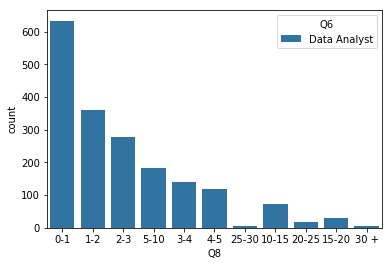

In [31]:
import seaborn as sns
sns.countplot(x='Q8',hue='Q6',data=DataAnalyst)

### Software Engineers

In [32]:
se=df_new[df_new['Q6']=='Software Engineer']

In [33]:
se.head(4)

,Q6,Q8
10,Software Engineer,3-4
30,Software Engineer,2-3
36,Software Engineer,5-10
37,Software Engineer,10-15


In [34]:
(se['Q8']).unique()

array(['3-4', '2-3', '5-10', '10-15', '0-1', '20-25', '1-2', '4-5',
       '15-20', '30 +', '25-30'], dtype=object)

In [35]:
sdf2=se['Q8'].value_counts().reindex(['0-1', '5-10', '1-2', '2-3', '4-5', '3-4', '10-15', '25-30',
       '15-20', '20-25', '30 +'])
sdf2

0-1      600
5-10     520
1-2      500
2-3      337
4-5      238
3-4      264
10-15    322
25-30     27
15-20    134
20-25     71
30 +      31
Name: Q8, dtype: int64

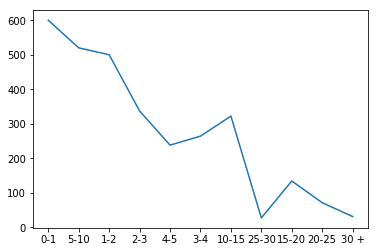

In [36]:
plt.plot(sdf2)

# RESEARCH SCIENTIST

In [37]:
re=df_new[df_new['Q6']=='Research Scientist']


In [38]:
re.head()

,Q6,Q8
24,Research Scientist,0-1
42,Research Scientist,1-2
49,Research Scientist,5-10
68,Research Scientist,3-4
79,Research Scientist,3-4


In [40]:
re=re.values

TypeError: unhashable type: 'numpy.ndarray'

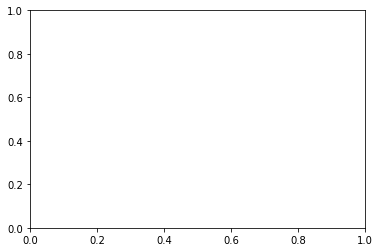

In [41]:
plt.plot(re,color='red',linestyle='dashed',marker='o',markersize=8,markerfacecolor='yellow')

In [ ]:
sns.countplot(x='Q8',hue='Q6',saturation=1,edgecolor=(0,1,0),linewidth=3,data=re)

In [ ]:
(re['Q8']).unique()

In [ ]:
re3=re['Q8'].value_counts().reindex(['0-1', '1-2', '5-10', '3-4', '2-3', '30 +', '25-30', '4-5',
       '10-15', '15-20', '20-25'])
re3
#re3=re.values

In [42]:
plt.plot(re3,color='red',linestyle='dashed',marker='o',markersize=8,markerfacecolor='yellow')

NameError: name 're3' is not defined

## RESEARCH ASSITANT

In [ ]:
ra=df_new[df_new['Q6']=='Research Assistant']

In [ ]:
ra.head()

In [ ]:
sns.countplot(x='Q6',hue='Q8', palette="rocket",data=ra)

In [ ]:
(ra['Q8'].unique())

In [ ]:
ra6=ra['Q8'].value_counts().reindex(['1-2', '0-1', '3-4', '2-3', '5-10', '4-5', '15-20', '10-15',
       '25-30'])

In [ ]:
plt.plot(ra6,color='green',linestyle='dashed',marker='o',markersize=8,markerfacecolor='blue')

# BUSINESS ANALYST

In [ ]:
bs=df_new[df_new['Q6']=='Business Analyst']

In [ ]:
bs.head()

In [ ]:
sns.swarmplot(x='Q6',hue='Q8',data=bs,palette="deep",edgecolor='green')

In [ ]:
sns.countplot(x='Q6',hue='Q8',data=bs,palette="rocket")

In [ ]:
(bs['Q8'].unique())

In [ ]:
bs6=bs['Q8'].value_counts().reindex(['10-15', '1-2', '3-4', '0-1', '2-3', '4-5', '5-10', '20-25',
       '25-30', '15-20', '30 +'])


In [ ]:
bs6.head()

In [ ]:
plt.plot(bs6,marker='o',markersize=8,markerfacecolor='red')

# DATA ENGINEER

In [ ]:
de=df_new[df_new['Q6']=='Data Engineer']

In [ ]:
de.head()

In [ ]:
sns.countplot(x='Q6',hue='Q8',data=de,palette="vlag")

In [ ]:
(de['Q8'].unique())

In [ ]:
de6=de['Q8'].value_counts().reindex(['2-3', '10-15', '5-10', '0-1', '1-2', '3-4', '4-5', '20-25',
       '15-20', '25-30', '30 +'] )
de6

In [ ]:
de6.head()

In [ ]:
plt.plot(de6,marker='o',markersize=8,markerfacecolor='orange')

# CONSULTANT

In [ ]:
ct=df_new[df_new['Q6']=='Consultant']

In [ ]:
ct.head()

In [ ]:
#import seaborn as sns
sns.countplot(x='Q6',hue='Q8',data=Ct,palette="rocket")

In [ ]:
(ct['Q8']).unique()

In [ ]:
ct6=Ct['Q8'].value_counts().reindex(['4-5', '5-10', '2-3', '3-4', '1-2', '0-1', '10-15', '15-20',
       '20-25', '30 +', '25-30'])
ct6

In [ ]:
ct6.head()

In [ ]:
plt.plot(ct6,marker='o',markersize=8,markerfacecolor='orange')

## overall contribution

In [ ]:
newdf=q7[(df['Q6']!='Student') & (df['Q6']!='Not employed') & (df['Q6']!='Other')
         & (df['Q6']!='Salesperson') & (df['Q6']!='Dats Journelist')]

In [ ]:
newdf['Q6'].value_counts().plot(kind='pie',
                              title="%",figsize=(14,15),counterclock=True,shadow=True,autopct='%1.1f%%')


### overall contribution

In [ ]:
newdf=q7[(df['Q6']!='Student') & (df['Q6']!='Not employed') & (df['Q6']!='Other')
         & (df['Q6']!='Salesperson') & (df['Q6']!='Dats Journelist')]

In [ ]:
newdf['Q6'].value_counts().plot(kind='pie',
                              title="%",figsize=(14,15))